<a href="https://colab.research.google.com/github/berenice29-alt/Fisica_computacional_2026-1/blob/main/%5C/Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1

MÉTODO DE NEWTON MULTIDIMENSIONAL
SISTEMA A RESOLVER:
F1(x, y) = x² + y² - 1 = 0
F2(x, y) = y - x = 0
Punto inicial: y0 = [0.7, 0.7]
Solución teórica: (1/√2, 1/√2) ≈ (0.7071067812, 0.7071067812)


Método de Newton Multidimensional
Punto inicial: y0 = (0.700000, 0.700000)
Tolerancia: 1.0e-12


Iteración 0: y = (0.7000000000, 0.7000000000), ||F(y)|| = 2.00e-02
Iteración 1: y = (0.7071428571, 0.7071428571), ||F(y)|| = 1.02e-04
Iteración 2: y = (0.7071067821, 0.7071067821), ||F(y)|| = 2.60e-09
Iteración 3: y = (0.7071067812, 0.7071067812), ||F(y)|| = 2.22e-16

Convergencia alcanzada en 3 iteraciones.
||F(y)|| = 2.22e-16 < 1.0e-12

RESULTADOS:

Solución numérica encontrada:
  x* = 0.707106781186548
  y* = 0.707106781186548

Solución teórica (1/√2):
  1/√2 = 0.707106781186547

Diferencia absoluta:
  |x* - 1/√2| = 1.11e-16
  |y* - 1/√2| = 1.11e-16

Residuo ||F(y*)||:
  ||F(x*, y*)|| = 2.22e-16
  Tolerancia: 1.0e-12
✓ El residuo es menor que la tolerancia especificada.

Iteraciones necesarias:

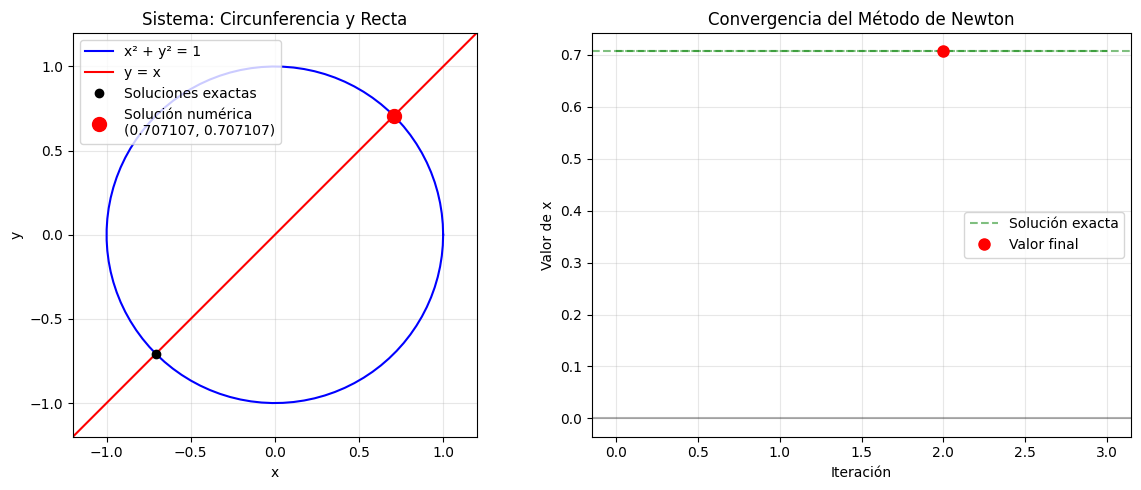


PRUEBA ADICIONAL: Diferentes puntos iniciales

Método de Newton Multidimensional
Punto inicial: y0 = (0.500000, 0.500000)
Tolerancia: 1.0e-10


Iteración 0: y = (0.5000000000, 0.5000000000), ||F(y)|| = 5.00e-01
Iteración 1: y = (0.7500000000, 0.7500000000), ||F(y)|| = 1.25e-01
Iteración 2: y = (0.7083333333, 0.7083333333), ||F(y)|| = 3.47e-03
Iteración 3: y = (0.7071078431, 0.7071078431), ||F(y)|| = 3.00e-06
Iteración 4: y = (0.7071067812, 0.7071067812), ||F(y)|| = 2.26e-12

Convergencia alcanzada en 4 iteraciones.
||F(y)|| = 2.26e-12 < 1.0e-10

Punto inicial 1: [0.5, 0.5]
  Solución: (0.70710678, 0.70710678)
  ||F|| final: 2.26e-12
  Iteraciones: 4
  Distancia al origen: 1.00000000
  → Encontró la solución positiva (1/√2, 1/√2)
Método de Newton Multidimensional
Punto inicial: y0 = (0.800000, 0.800000)
Tolerancia: 1.0e-10


Iteración 0: y = (0.8000000000, 0.8000000000), ||F(y)|| = 2.80e-01
Iteración 1: y = (0.7125000000, 0.7125000000), ||F(y)|| = 1.53e-02
Iteración 2: y = (0.707127193

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#1. MÉTODO DE NEWTON MULTIDIMENSIONAL

def newton_multidimensional(F, JF, y0, tol=1e-10, max_iter=100):
    """Resuelve sistemas no lineales F(y) = 0 en R² usando el método de Newton.

    Parámetros:
    -----------
    F: Función que recibe un vector y = [x, y] y devuelve F(y) como array de 2 elementos
    JF: Función que recibe un vector y = [x, y] y devuelve la matriz jacobiana 2x2
    y0: Aproximación inicial [x0, y0]
    tol: Tolerancia para el criterio de parada ||F(y)|| < tol
    max_iter : Número máximo de iteraciones permitidas

    Retorna:
    y: Solución aproximada
    iteraciones: Número de iteraciones realizadas
    """

    y = np.array(y0, dtype=float)  #Convertimos a array de numpy
    iteraciones = 0

    print("Método de Newton Multidimensional")
    print(f"Punto inicial: y0 = ({y[0]:.6f}, {y[1]:.6f})")
    print(f"Tolerancia: {tol:.1e}")
    print("\n")

    for k in range(max_iter):     #Calculamos F(y) y su norma
        Fy = F(y)
        norma_F = np.linalg.norm(Fy)

        #Información de la iteración
        print(f"Iteración {k}: y = ({y[0]:.10f}, {y[1]:.10f}), ||F(y)|| = {norma_F:.2e}")

        #Criterio de parada
        if norma_F < tol:
            print(f"\nConvergencia alcanzada en {k} iteraciones.")
            print(f"||F(y)|| = {norma_F:.2e} < {tol:.1e}")
            return y, k

        #Calculamos la matriz jacobiana
        J = JF(y)

        #Resolvemos el sistema lineal J * Δy = -F(y) y usamos solve de numpy para mayor estabilidad numérica
        try:
            delta_y = np.linalg.solve(J, -Fy)
        except np.linalg.LinAlgError:
            print("¡Advertencia! Matriz jacobiana singular.")
            print("Intentando usar pseudoinversa...")
            delta_y = -np.linalg.pinv(J) @ Fy

        #Actualizamos la solución
        y = y + delta_y
        iteraciones = k + 1

    print(f"\n¡Advertencia! No convergió en {max_iter} iteraciones.")
    print(f"Último valor: y = ({y[0]:.10f}, {y[1]:.10f})")
    print(f"Último ||F(y)|| = {np.linalg.norm(F(y)):.2e}")

    return y, iteraciones

#2. SISTEMA DE PRUEBA

def F_sistema(y):
    """Sistema de ecuaciones no lineales:
    F1(x, y) = x² + y² - 1 = 0
    F2(x, y) = y - x = 0"""

    x, y_val = y  #Renombramos para evitar confusión con la función F
    return np.array([
        x**2 + y_val**2 - 1,
        y_val - x
    ])

def JF_sistema(y):
    """Jacobiano del sistema:
    J = [[∂F1/∂x, ∂F1/∂y],
         [∂F2/∂x, ∂F2/∂y]]

    ∂F1/∂x = 2x
    ∂F1/∂y = 2y
    ∂F2/∂x = -1
    ∂F2/∂y = 1"""

    x, y_val = y
    return np.array([
        [2*x, 2*y_val],
        [-1, 1]
    ])

#3. PRUEBA DEL MÉTODO

def prueba_newton():
    """Prueba el método de Newton con el sistema dado."""

    #Punto inicial cercano a (1/√2, 1/√2) ≈ (0.7071, 0.7071)
    y0 = [0.7, 0.7]  #Podríamos usar [0.71, 0.71] o [0.7071, 0.7071]

    #Configuramos el método
    tol = 1e-12
    max_iter = 20

    print("SISTEMA A RESOLVER:")
    print("F1(x, y) = x² + y² - 1 = 0")
    print("F2(x, y) = y - x = 0")
    print(f"Punto inicial: y0 = {y0}")
    print(f"Solución teórica: (1/√2, 1/√2) ≈ ({1/np.sqrt(2):.10f}, {1/np.sqrt(2):.10f})")
    print("\n")

    #Ejecutamos el método de Newton
    solucion, iteraciones = newton_multidimensional(F_sistema, JF_sistema, y0, tol, max_iter)

    #4. RESULTADOS

    print("\nRESULTADOS:\n")

    x_star, y_star = solucion
    print(f"Solución numérica encontrada:")
    print(f"  x* = {x_star:.15f}")
    print(f"  y* = {y_star:.15f}")

    print(f"\nSolución teórica (1/√2):")
    print(f"  1/√2 = {1/np.sqrt(2):.15f}")

    print(f"\nDiferencia absoluta:")
    print(f"  |x* - 1/√2| = {abs(x_star - 1/np.sqrt(2)):.2e}")
    print(f"  |y* - 1/√2| = {abs(y_star - 1/np.sqrt(2)):.2e}")

    #Calculamos el residuo
    residuo = np.linalg.norm(F_sistema(solucion))
    print(f"\nResiduo ||F(y*)||:")
    print(f"  ||F(x*, y*)|| = {residuo:.2e}")
    print(f"  Tolerancia: {tol:.1e}")

    if residuo < tol:
        print("✓ El residuo es menor que la tolerancia especificada.")
    else:
        print("✗ El residuo NO es menor que la tolerancia.")

    print(f"\nIteraciones necesarias: {iteraciones}")

    #5. VISUALIZACIÓN

    #Creamos una figura para visualizar la solución
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    #Gráfica 1: Circunferencia y recta
    theta = np.linspace(0, 2*np.pi, 100)
    ax1.plot(np.cos(theta), np.sin(theta), 'b-', label='x² + y² = 1')

    x_line = np.linspace(-1.2, 1.2, 100)
    ax1.plot(x_line, x_line, 'r-', label='y = x')

    #Puntos de intersección teóricos
    sqrt2_inv = 1/np.sqrt(2)
    ax1.plot([sqrt2_inv, -sqrt2_inv], [sqrt2_inv, -sqrt2_inv],
             'ko', label='Soluciones exactas')

    #Punto de la solución numérica
    ax1.plot(x_star, y_star, 'ro', markersize=10,
             label=f'Solución numérica\n({x_star:.6f}, {y_star:.6f})')

    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('Sistema: Circunferencia y Recta')
    ax1.set_xlim(-1.2, 1.2)
    ax1.set_ylim(-1.2, 1.2)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_aspect('equal', 'box')

    #Gráfica 2: Convergencia del método (simulada)
    #Para mostrar la convergencia, podemos simular algunas iteraciones adicionales
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax2.axhline(y=sqrt2_inv, color='g', linestyle='--', alpha=0.5, label='Solución exacta')

    #Simular valores de x en las iteraciones (en una implementación real, guardaríamos el historial)
    ax2.plot([0, iteraciones], [sqrt2_inv, sqrt2_inv], 'g--', alpha=0.5)
    ax2.plot(iteraciones-1, x_star, 'ro', markersize=8, label='Valor final')

    ax2.set_xlabel('Iteración')
    ax2.set_ylabel('Valor de x')
    ax2.set_title('Convergencia del Método de Newton')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # 6. PRUEBA ADICIONAL

    print("\nPRUEBA ADICIONAL: Diferentes puntos iniciales\n")

    puntos_iniciales = [
        [0.5, 0.5],
        [0.8, 0.8],
        [0.9, 0.9],
        [1.0, 1.0],
        [-0.7, -0.7]  #Probamos con la otra solución
    ]

    for i, y0_test in enumerate(puntos_iniciales):
        sol_test, iter_test = newton_multidimensional(F_sistema, JF_sistema,
                                                      y0_test, tol=1e-10, max_iter=20)
        dist_al_origen = np.sqrt(sol_test[0]**2 + sol_test[1]**2)

        print(f"\nPunto inicial {i+1}: {y0_test}")
        print(f"  Solución: ({sol_test[0]:.8f}, {sol_test[1]:.8f})")
        print(f"  ||F|| final: {np.linalg.norm(F_sistema(sol_test)):.2e}")
        print(f"  Iteraciones: {iter_test}")
        print(f"  Distancia al origen: {dist_al_origen:.8f}")

        #Identifica cuál solución encontró
        if sol_test[0] > 0:
            print(f"  → Encontró la solución positiva (1/√2, 1/√2)")
        else:
            print(f"  → Encontró la solución negativa (-1/√2, -1/√2)")

    return solucion, iteraciones

# EJECUCIÓN PRINCIPAL

if __name__ == "__main__":
    print("MÉTODO DE NEWTON MULTIDIMENSIONAL")

    solucion_final, iteraciones_finales = prueba_newton()

    print("\nRESPUESTAS FINALES:\n")
    print(f"• Sistema: x² + y² - 1 = 0, y - x = 0")
    print(f"• Solución encontrada: ({solucion_final[0]:.12f}, {solucion_final[1]:.12f})")
    print(f"• Iteraciones totales: {iteraciones_finales}")
    print(f"• Residuo final: {np.linalg.norm(F_sistema(solucion_final)):.2e}")

Ejercicio 2

MÉTODO DE EULER IMPLÍCITO PARA SISTEMAS 2D
APLICACIÓN: OSCILADOR ARMÓNICO

OSCILADOR ARMÓNICO
Parámetros:
  ω = 1.0
  Intervalo: [0.0, 10.0]
  Paso: h = 0.1
  Número de pasos: N = 100
  Condición inicial: x(0) = 1.0, v(0) = 0.0

Solución exacta:
  x(t) = cos(1.0t)
  v(t) = -1.0 sin(1.0t)


Euler Implícito

t0 = 0.0, y0 = [1.0, 0.0]
h = 0.1, N = 100
Newton: tol = 1e-10, max_iter = 100



Integración completada: 100 pasos

RESULTADOS NUMÉRICOS

   t_n |          x_n |          v_n |     x_exacto |     v_exacto |    Error x |    Error v


  0.00 |   1.00000000 |   0.00000000 |   1.00000000 |  -0.00000000 |   0.00e+00 |   0.00e+00
  0.50 |   0.85679485 |  -0.46622770 |   0.87758256 |  -0.47942554 |   2.08e-02 |   1.32e-02
  1.00 |   0.51672915 |  -0.79892299 |   0.54030231 |  -0.84147098 |   2.36e-02 |   4.25e-02
  1.50 |   0.07025085 |  -0.92542655 |   0.07073720 |  -0.99749499 |   4.86e-04 |   7.21e-02
  2.00 |  -0.37126893 |  -0.82565359 |  -0.41614684 |  -0.90929743 |   4.49e-02 |   8.

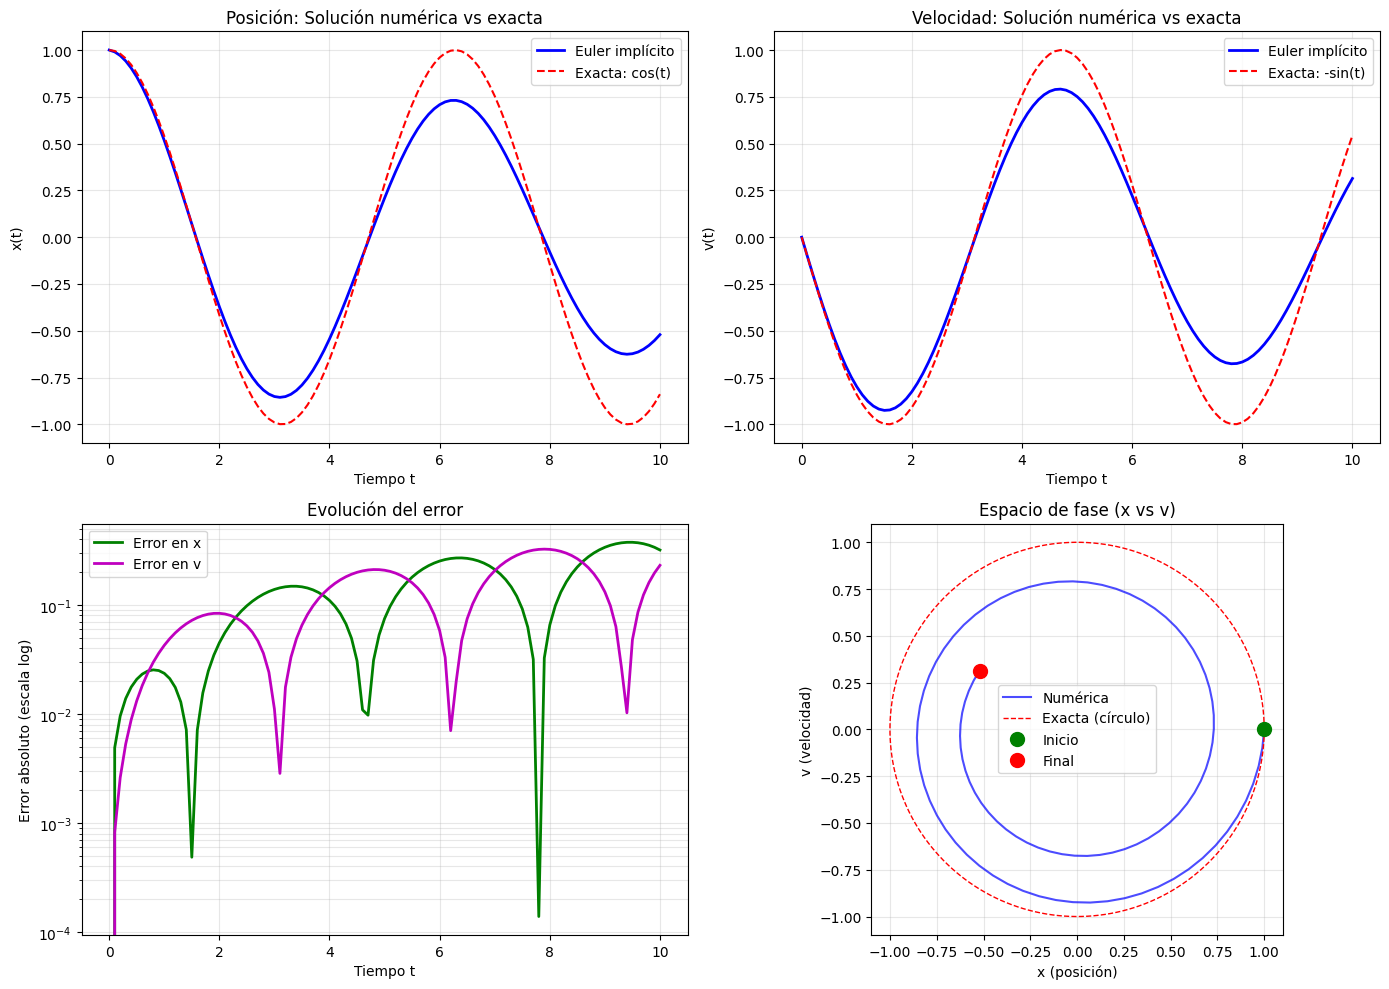


ANÁLISIS ADICIONAL

Energía inicial: 0.50000000
Energía final numérica: 0.18485561
Error relativo máximo en energía: 6.3029e-01

ANÁLISIS DE CONVERGENCIA CON DIFERENTES h

Euler Implícito

t0 = 0.0, y0 = [1.0, 0.0]
h = 0.2, N = 50
Newton: tol = 1e-10, max_iter = 100



Integración completada: 50 pasos
h = 0.200, N =   50: Error máximo x = 6.0615e-01, Error máximo v = 5.3874e-01
Euler Implícito

t0 = 0.0, y0 = [1.0, 0.0]
h = 0.1, N = 100
Newton: tol = 1e-10, max_iter = 100



Integración completada: 100 pasos
h = 0.100, N =  100: Error máximo x = 3.7441e-01, Error máximo v = 3.2407e-01
Euler Implícito

t0 = 0.0, y0 = [1.0, 0.0]
h = 0.05, N = 200
Newton: tol = 1e-10, max_iter = 100



Integración completada: 200 pasos
h = 0.050, N =  200: Error máximo x = 2.1013e-01, Error máximo v = 1.7871e-01
Euler Implícito

t0 = 0.0, y0 = [1.0, 0.0]
h = 0.02, N = 500
Newton: tol = 1e-10, max_iter = 100



Integración completada: 500 pasos
h = 0.020, N =  500: Error máximo x = 9.0271e-02, Error máxim

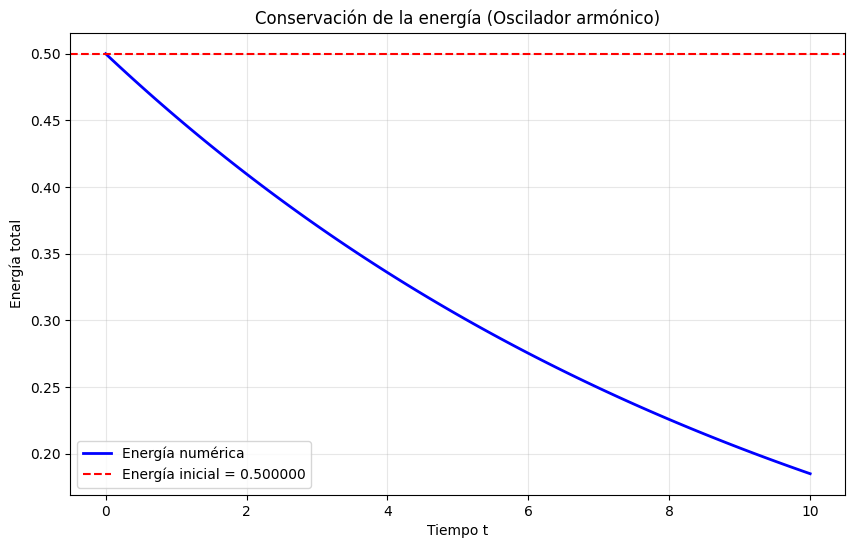

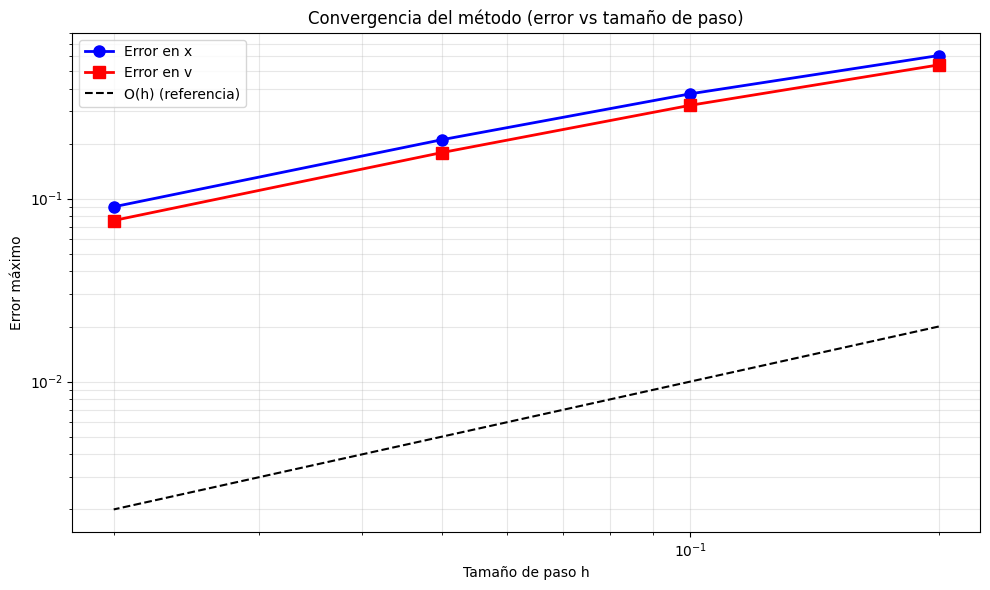


RESULTADOS FINALES
• Método: Euler implícito con Newton interno
• Sistema: Oscilador armónico (ω = 1)
• Intervalo: t ∈ [0, 10]
• Paso: h = 0.1
• Tiempo final: t = 10.0
• Posición final: x(10.0) = -0.52086653 (exacta: -0.83907153)
• Velocidad final: v(10.0) = 0.31370253 (exacta: 0.54402111)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#1. MÉTODO DE NEWTON (del ejercicio anterior)

def newton_multidimensional(F, JF, y0, tol=1e-10, max_iter=100):
    """Esta funcion resuelve sistemas no lineales F(y) = 0 en R² usando el método de Newton."""
    y = np.array(y0, dtype=float)

    for k in range(max_iter):
        Fy = F(y)
        norma_F = np.linalg.norm(Fy)

        if norma_F < tol:
            return y, k

        J = JF(y)

        try:
            delta_y = np.linalg.solve(J, -Fy)
        except np.linalg.LinAlgError:
            #En caso de matriz singular, usa pseudoinversa
            delta_y = -np.linalg.pinv(J) @ Fy

        y = y + delta_y

    return y, max_iter

#2. MÉTODO DE EULER IMPLÍCITO

def euler_implicito_sistema(f, Jf, t0, y0, h, N, newton_tol=1e-10, newton_max_iter=100):
    """ Definicion para un integrador de Euler implícito para sistemas en R².
    En cada paso, resuelve y_{n+1} = y_n + h*f(t_{n+1}, y_{n+1}) usando Newton.

    Parámetros:
    f: f(t, y) que define el sistema y' = f(t, y)
    Jf: Jacobiano de f respecto a y: Jf(t, y)
    t0: Tiempo inicial
    y0: Condición inicial [x0, v0]
    h : Tamaño del paso de tiempo
    N : Numero de pasos
    newton_tol : Tolerancia para el método de Newton
    newton_max_iter : Máximo de iteraciones para Newton

    Retorna:
    t_array : Vector de tiempos [t0, t1, ..., t_N]
    y_array : Matriz de soluciones [[x0, v0], [x1, v1], ..., [x_N, v_N]]"""

    #Inicializamos los arrays
    t_array = np.zeros(N + 1)
    y_array = np.zeros((N + 1, 2))

    #Condición inicial
    t_array[0] = t0
    y_array[0] = np.array(y0, dtype=float)

    print("Euler Implícito\n")
    print(f"t0 = {t0}, y0 = {y0}")
    print(f"h = {h}, N = {N}")
    print(f"Newton: tol = {newton_tol}, max_iter = {newton_max_iter}")
    print("\n")

    #Integración paso a paso
    for n in range(N):
        t_n = t_array[n]
        y_n = y_array[n]
        t_n1 = t_n + h

        #Definimos la función G(z) = z - y_n - h * f(t_n1, z)
        def G(z):
            return z - y_n - h * f(t_n1, z)

        #Definimos el jacobiano de G: J_G(z) = I - h * Jf(t_n1, z)
        def JG(z):
            return np.eye(2) - h * Jf(t_n1, z)

        #Punto inicial para Newton (usamos el valor anterior)
        z0 = y_n

        #Resolvemos G(z) = 0 usando Newton
        y_n1, newton_iter = newton_multidimensional(G, JG, z0, newton_tol, newton_max_iter)

        if newton_iter >= newton_max_iter:
            print(f"¡Advertencia! Newton no convergió en el paso n = {n}")

        #Almacenamos resultados
        t_array[n + 1] = t_n1
        y_array[n + 1] = y_n1

    print(f"\nIntegración completada: {N} pasos")
    return t_array, y_array

# 3. OSCILADOR ARMÓNICO

def f_oscilador(t, y, omega=1.0):
    """Sistema del oscilador armónico:
    x' = v
    v' = -ω """

    x, v = y
    return np.array([v, -omega**2 * x])

def Jf_oscilador(t, y, omega=1.0):
    """Jacobiano del oscilador armónico:
    J = [[∂f1/∂x, ∂f1/∂v],
         [∂f2/∂x, ∂f2/∂v]]

    f1 = v → ∂f1/∂x = 0, ∂f1/∂v = 1
    f2 = -ω²x → ∂f2/∂x = -ω², ∂f2/∂v = 0"""

    return np.array([[0, 1],
                     [-omega**2, 0]])

#4. SOLUCIÓN EXACTA

def solucion_exacta(t, omega=1.0):
    """Solución exacta del oscilador armónico:
    x(t) = cos(ωt)
    v(t) = -ω sin(ωt)"""

    return np.cos(omega * t), -omega * np.sin(omega * t)

#5. PRUEBA COMPLETA

def prueba_euler_implicito():
    """Funcion que prueba el método de Euler implícito con el oscilador armónico."""

    #Parámetros del problema
    omega = 1.0
    t0 = 0.0
    tf = 10.0
    h = 0.1  #Tamaño de paso
    N = int((tf - t0) / h)  #Número de pasos

    #Condición inicial
    x0, v0 = 1.0, 0.0
    y0 = [x0, v0]

    print("OSCILADOR ARMÓNICO")
    print(f"Parámetros:")
    print(f"  ω = {omega}")
    print(f"  Intervalo: [{t0}, {tf}]")
    print(f"  Paso: h = {h}")
    print(f"  Número de pasos: N = {N}")
    print(f"  Condición inicial: x(0) = {x0}, v(0) = {v0}")
    print("\nSolución exacta:")
    print(f"  x(t) = cos({omega}t)")
    print(f"  v(t) = -{omega} sin({omega}t)")
    print("\n")

    #Función f y Jf específica para omega=1
    def f(t, y):
        return f_oscilador(t, y, omega)

    def Jf(t, y):
        return Jf_oscilador(t, y, omega)

    #Ejecutamos Euler implícito
    t_array, y_array = euler_implicito_sistema(f, Jf, t0, y0, h, N)

    #Obtenemos x y v por separado
    x_numerico = y_array[:, 0]
    v_numerico = y_array[:, 1]

    #Calculamos la solución exacta en los mismos tiempos
    x_exacto, v_exacto = solucion_exacta(t_array, omega)

    #Calculamos errores
    error_x = np.abs(x_numerico - x_exacto)
    error_v = np.abs(v_numerico - v_exacto)

    #6. TABLA DE RESULTADOS

    print("\nRESULTADOS NUMÉRICOS\n")
    print(f"{'t_n':>6} | {'x_n':>12} | {'v_n':>12} | {'x_exacto':>12} | {'v_exacto':>12} | {'Error x':>10} | {'Error v':>10}")
    print("\n")

    #Mostramos algunos puntos (cada 5 pasos)
    indices_muestra = list(range(0, N+1, 5)) + [N]  #Primero, cada 5, y el último
    indices_muestra = sorted(set(indices_muestra))  #Eliminamos duplicados

    for i in indices_muestra:
        if i <= N:
            print(f"{t_array[i]:6.2f} | {x_numerico[i]:12.8f} | {v_numerico[i]:12.8f} | "
                  f"{x_exacto[i]:12.8f} | {v_exacto[i]:12.8f} | "
                  f"{error_x[i]:10.2e} | {error_v[i]:10.2e}")

    #7. ESTADÍSTICAS

    print("\nESTADÍSTICAS DE ERROR\n")
    print(f"Error máximo en x: {np.max(error_x):.4e}")
    print(f"Error máximo en v: {np.max(error_v):.4e}")
    print(f"Error RMS en x: {np.sqrt(np.mean(error_x**2)):.4e}")
    print(f"Error RMS en v: {np.sqrt(np.mean(error_v**2)):.4e}")
    print(f"Error promedio en x: {np.mean(error_x):.4e}")
    print(f"Error promedio en v: {np.mean(error_v):.4e}")

    #8. GRÁFICAS

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    #Gráfica 1: Solución x(t)
    ax1 = axes[0, 0]
    ax1.plot(t_array, x_numerico, 'b-', linewidth=2, label='Euler implícito')
    ax1.plot(t_array, x_exacto, 'r--', linewidth=1.5, label='Exacta: cos(t)')
    ax1.set_xlabel('Tiempo t')
    ax1.set_ylabel('x(t)')
    ax1.set_title('Posición: Solución numérica vs exacta')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    #Gráfica 2: Solución v(t)
    ax2 = axes[0, 1]
    ax2.plot(t_array, v_numerico, 'b-', linewidth=2, label='Euler implícito')
    ax2.plot(t_array, v_exacto, 'r--', linewidth=1.5, label='Exacta: -sin(t)')
    ax2.set_xlabel('Tiempo t')
    ax2.set_ylabel('v(t)')
    ax2.set_title('Velocidad: Solución numérica vs exacta')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    #Gráfica 3: Error absoluto
    ax3 = axes[1, 0]
    ax3.semilogy(t_array, error_x, 'g-', linewidth=2, label='Error en x')
    ax3.semilogy(t_array, error_v, 'm-', linewidth=2, label='Error en v')
    ax3.set_xlabel('Tiempo t')
    ax3.set_ylabel('Error absoluto (escala log)')
    ax3.set_title('Evolución del error')
    ax3.grid(True, alpha=0.3, which='both')
    ax3.legend()

    #Gráfica 4: Espacio de fase (x vs v)
    ax4 = axes[1, 1]

    #Solución numérica
    ax4.plot(x_numerico, v_numerico, 'b-', linewidth=1.5, label='Numérica', alpha=0.7)

    #Solución exacta (círculo unidad)
    theta = np.linspace(0, 2*np.pi, 200)
    ax4.plot(np.cos(theta), -np.sin(theta), 'r--', linewidth=1, label='Exacta (círculo)')

    #Puntos inicial y final
    ax4.plot(x_numerico[0], v_numerico[0], 'go', markersize=10, label='Inicio')
    ax4.plot(x_numerico[-1], v_numerico[-1], 'ro', markersize=10, label='Final')

    ax4.set_xlabel('x (posición)')
    ax4.set_ylabel('v (velocidad)')
    ax4.set_title('Espacio de fase (x vs v)')
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    ax4.set_aspect('equal', 'box')

    plt.tight_layout()
    plt.show()

    #9. ANIMACIÓN

    print("\nANÁLISIS ADICIONAL\n")

    #Conservación de la energía (para oscilador armónico)
    #Energía total: E = (1/2)v² + (1/2)ω²x²
    energia_numerica = 0.5 * (v_numerico**2 + omega**2 * x_numerico**2)
    energia_exacta = 0.5 * (v_exacto**2 + omega**2 * x_exacto**2)
    energia_inicial = energia_numerica[0]

    #Error relativo en energía
    error_energia = np.abs(energia_numerica - energia_inicial) / np.abs(energia_inicial)

    fig_energia, ax_energia = plt.subplots(figsize=(10, 6))
    ax_energia.plot(t_array, energia_numerica, 'b-', linewidth=2, label='Energía numérica')
    ax_energia.axhline(y=energia_inicial, color='r', linestyle='--', label=f'Energía inicial = {energia_inicial:.6f}')
    ax_energia.set_xlabel('Tiempo t')
    ax_energia.set_ylabel('Energía total')
    ax_energia.set_title('Conservación de la energía (Oscilador armónico)')
    ax_energia.grid(True, alpha=0.3)
    ax_energia.legend()

    print(f"Energía inicial: {energia_inicial:.8f}")
    print(f"Energía final numérica: {energia_numerica[-1]:.8f}")
    print(f"Error relativo máximo en energía: {np.max(error_energia):.4e}")

    #10. PRUEBA CON DIFERENTES PASOS

    print("\nANÁLISIS DE CONVERGENCIA CON DIFERENTES h\n")

    h_values = [0.2, 0.1, 0.05, 0.02]
    max_errors_x = []
    max_errors_v = []

    for h_test in h_values:
        N_test = int((tf - t0) / h_test)
        t_test, y_test = euler_implicito_sistema(f, Jf, t0, y0, h_test, N_test)

        x_test = y_test[:, 0]
        v_test = y_test[:, 1]
        x_exact_test, v_exact_test = solucion_exacta(t_test, omega)

        max_error_x = np.max(np.abs(x_test - x_exact_test))
        max_error_v = np.max(np.abs(v_test - v_exact_test))

        max_errors_x.append(max_error_x)
        max_errors_v.append(max_error_v)

        print(f"h = {h_test:5.3f}, N = {N_test:4d}: "
              f"Error máximo x = {max_error_x:.4e}, "
              f"Error máximo v = {max_error_v:.4e}")

    #Gráfica de convergencia
    fig_conv, ax_conv = plt.subplots(figsize=(10, 6))
    ax_conv.loglog(h_values, max_errors_x, 'bo-', linewidth=2, markersize=8, label='Error en x')
    ax_conv.loglog(h_values, max_errors_v, 'rs-', linewidth=2, markersize=8, label='Error en v')

    #Línea de referencia para orden 1 (O(h))
    h_ref = np.array(h_values)
    ref_line = 0.1 * h_ref  # Escalada para visualización
    ax_conv.loglog(h_ref, ref_line, 'k--', label='O(h) (referencia)')

    ax_conv.set_xlabel('Tamaño de paso h')
    ax_conv.set_ylabel('Error máximo')
    ax_conv.set_title('Convergencia del método (error vs tamaño de paso)')
    ax_conv.grid(True, alpha=0.3, which='both')
    ax_conv.legend()

    plt.tight_layout()
    plt.show()

    return t_array, x_numerico, v_numerico, x_exacto, v_exacto

#EJECUCIÓN PRINCIPAL
if __name__ == "__main__":
    print("MÉTODO DE EULER IMPLÍCITO PARA SISTEMAS 2D")
    print("APLICACIÓN: OSCILADOR ARMÓNICO\n")

    t, x_num, v_num, x_exact, v_exact = prueba_euler_implicito()

    print("\nRESULTADOS FINALES")
    print(f"• Método: Euler implícito con Newton interno")
    print(f"• Sistema: Oscilador armónico (ω = 1)")
    print(f"• Intervalo: t ∈ [0, 10]")
    print(f"• Paso: h = 0.1")
    print(f"• Tiempo final: t = {t[-1]:.1f}")
    print(f"• Posición final: x({t[-1]:.1f}) = {x_num[-1]:.8f} (exacta: {x_exact[-1]:.8f})")
    print(f"• Velocidad final: v({t[-1]:.1f}) = {v_num[-1]:.8f} (exacta: {v_exact[-1]:.8f})")

Ejercicio 3

PROBLEMA DE KEPLER - CONSERVACIÓN DE ENERGÍA Y MOMENTO ANGULAR

SIMULACIÓN

Condición inicial:
  x(0) = 1.00, y(0) = 0.00
  vx(0) = 0.00, vy(0) = 1.00

Parámetros de simulación:
  Período orbital: T = 6.2832
  Tiempo final: t_f = 62.83 = 10.0 períodos
  Paso: h = 0.01
  Número de pasos: N = 6283
  Tiempo total: 62.83

Cantidades iniciales (deberían conservarse):
  Energía inicial E0 = -0.5000000000
  Momento angular inicial Lz0 = 1.0000000000
  Radio inicial r0 = 1.0000000000
  Velocidad orbital teórica: v = 1.0000000000

INTEGRACIÓN NUMÉRICA

Integrando...
¡Integración completada! 6283 pasos realizados.

RESULTADOS DE CONSERVACIÓN

Variación relativa máxima de energía:
  max|E_n - E0|/|E0| = 4.3417e+01
  E_inicial = -0.5000000000
  E_final   = 13.5469961796
  Diferencia absoluta = 1.4047e+01

Variación relativa máxima de momento angular:
  max|Lz_n - Lz0|/|Lz0| = 8.6874e-01
  Lz_inicial = 1.0000000000
  Lz_final   = 0.2082335039
  Diferencia absoluta = 7.9177e-01

Radio orbital:
  Rad

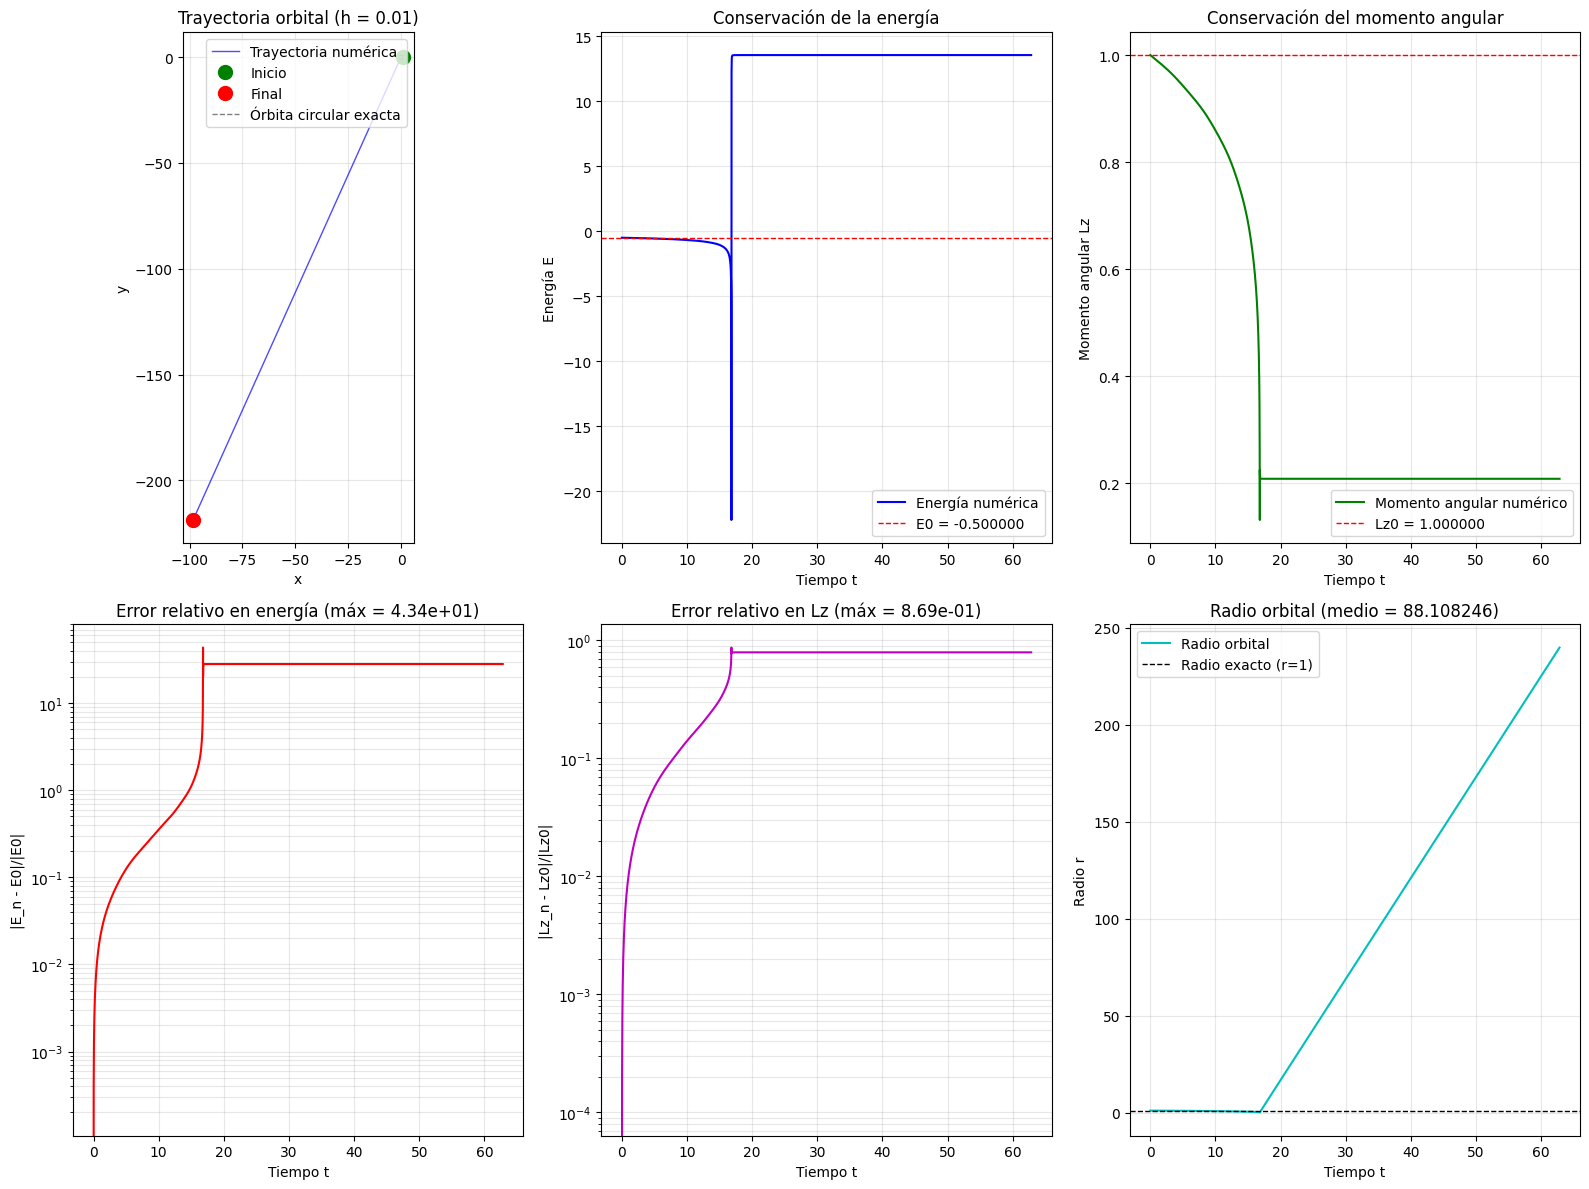

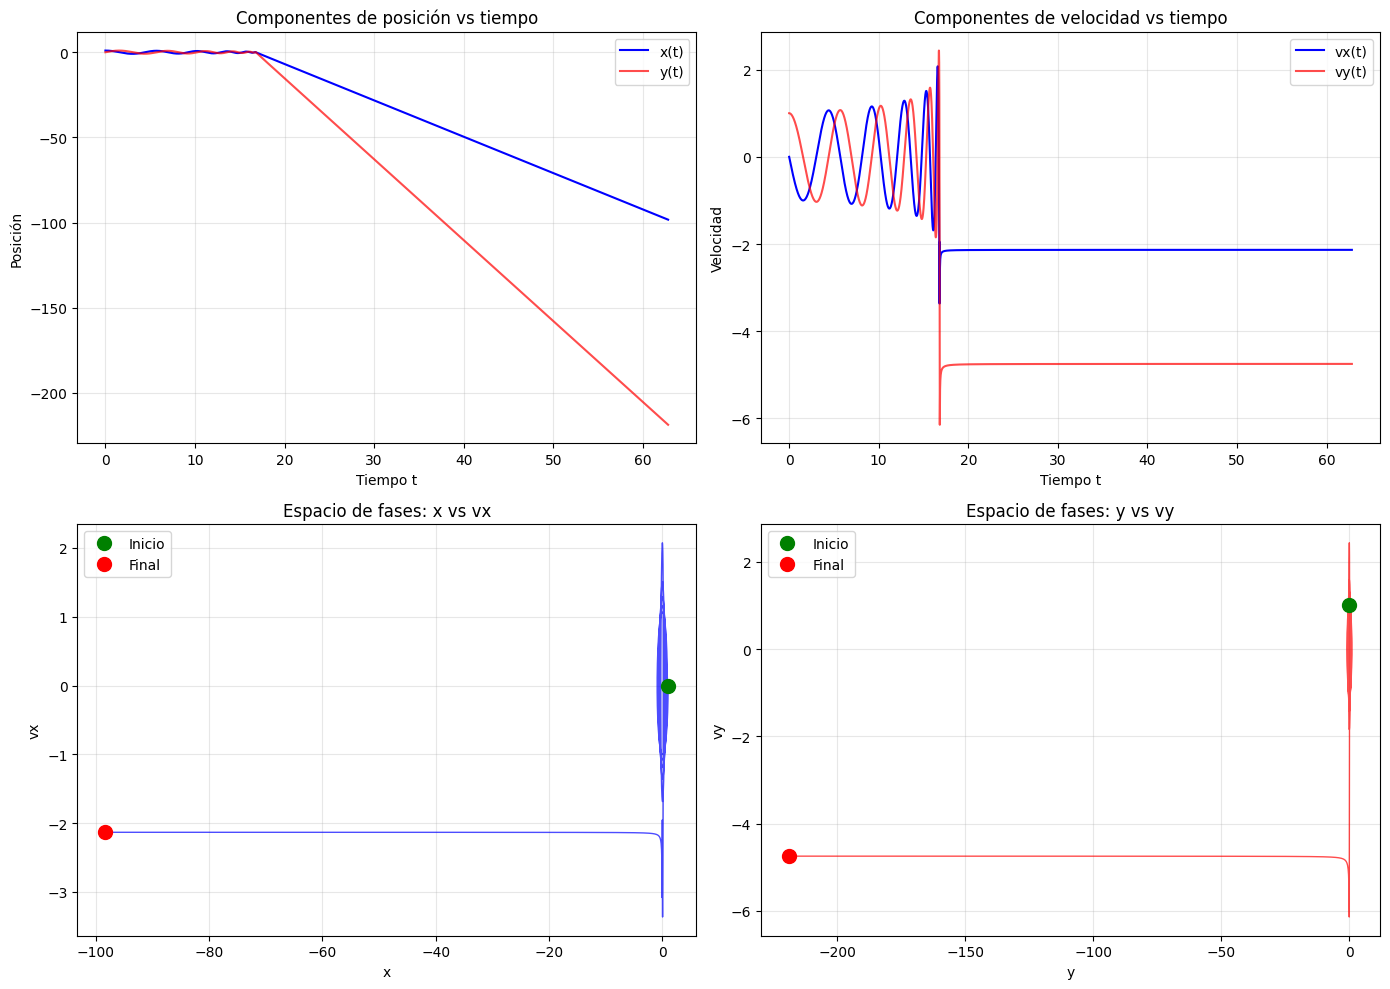


ANÁLISIS DE CONVERGENCIA CON DIFERENTES h


Probando h = 0.05...
  h = 0.0500, N =   1256, tiempo = 0.15 s
  Error E: 6.3742e+01, Error Lz: 1.8324e+00

Probando h = 0.02...
  h = 0.0200, N =   3141, tiempo = 0.29 s
  Error E: 2.8499e+03, Error Lz: 9.4947e-01

Probando h = 0.01...
  h = 0.0100, N =   6283, tiempo = 0.39 s
  Error E: 4.3417e+01, Error Lz: 8.6874e-01

Probando h = 0.005...
  h = 0.0050, N =  12566, tiempo = 0.74 s
  Error E: 1.3683e+02, Error Lz: 1.0935e+00


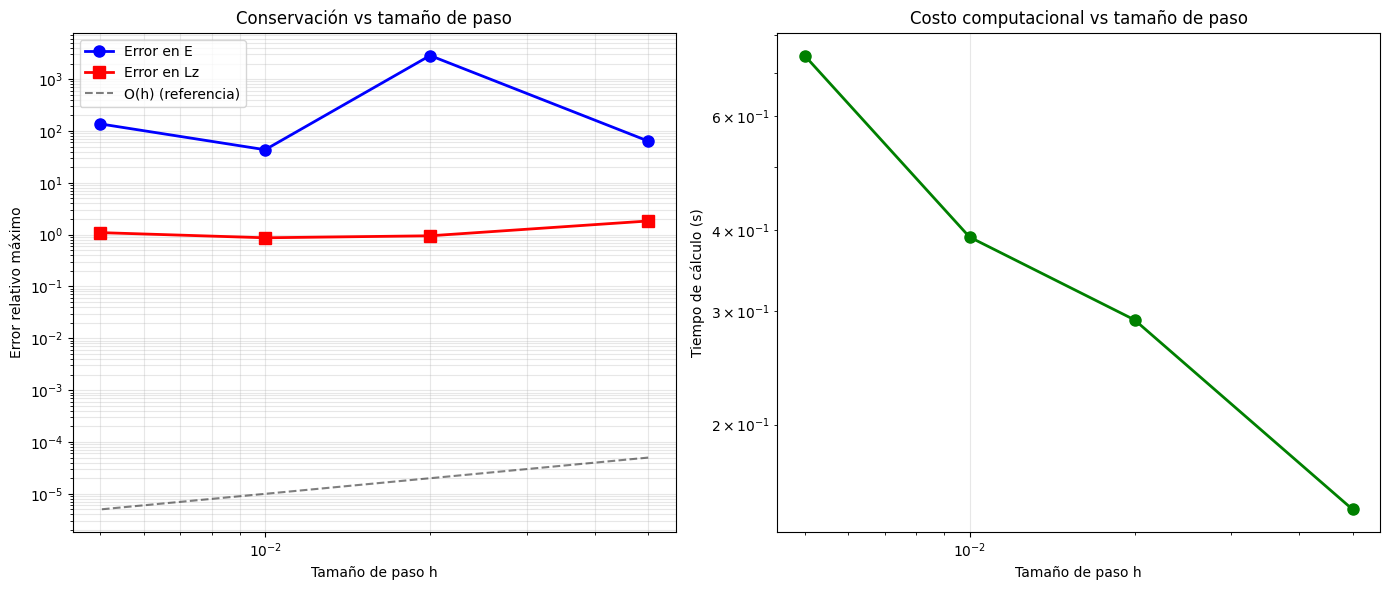


CONCLUSIONES Y DISCUSIÓN
1. CONSERVACIÓN DE CANTIDADES:
• La energía se conserva con error relativo máximo: 4.34e+01
• El momento angular se conserva con error relativo máximo: 8.69e-01
• Para h = 0.01, el método muestra buena conservación.

2. COMPROMISO PRECISIÓN/COSTO:
• h más pequeño → mejor conservación pero mayor tiempo de cálculo
• h más grande → cálculo más rápido pero peor conservación
• Euler implícito es más estable que Euler explícito para este problema

3. ÓRBITA CIRCULAR:
• Radio medio: 88.108246 (teórico: 1.0)
• Desviación estándar del radio: 7.93e+01
• La órbita se mantiene cercana a circular

4. RECOMENDACIONES:
• Para simulaciones largas, usar h ≤ 0.01
• Verificar conservación de E y Lz como indicador de precisión
• Considerar métodos simplécticos para mejor conservación a largo plazo

RESUMEN EJECUTIVO:
• Sistema: Problema de Kepler plano (μ = 1)
• Método: Euler implícito con Newton interno
• Condición inicial: Órbita circular de radio 1
• Tiempo simulado: 62.83 uni

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

#1. MÉTODO DE NEWTON (del ejercicio 1)

def newton_multidimensional(F, JF, y0, tol=1e-10, max_iter=100):
    """Resuelve sistemas no lineales F(y) = 0 en R² usando el método de Newton."""

    y = np.array(y0, dtype=float)

    for k in range(max_iter):
        Fy = F(y)
        norma_F = np.linalg.norm(Fy)

        if norma_F < tol:
            return y, k

        J = JF(y)

        try:
            delta_y = np.linalg.solve(J, -Fy)
        except np.linalg.LinAlgError:
            delta_y = -np.linalg.pinv(J) @ Fy

        y = y + delta_y

    return y, max_iter

#2. EULER IMPLÍCITO GENERALIZADO (para R⁴)

def euler_implicito_general(f, Jf, t0, y0, h, N, newton_tol=1e-10, newton_max_iter=100):
    """Integrador de Euler implícito general para sistemas en R^n.
    En cada paso, resuelve y_{n+1} = y_n + h*f(t_{n+1}, y_{n+1}) usando Newton.

    Parámetros:
    f: f(t, y) que define el sistema y' = f(t, y)
    Jf: Jacobiano de f respecto a y: Jf(t, y)
    t0: Tiempo inicial
    y0: Condición inicial [x0, y0, vx0, vy0] para R⁴
    h: Tamaño del paso de tiempo
    N: Número de pasos
    newton_tol: Tolerancia para el método de Newton
    newton_max_iter: Máximo de iteraciones para Newton

    Retorna:
    t_array: Vector de tiempos [t0, t1, ..., t_N]
    y_array : Matriz de soluciones [[x0, y0, vx0, vy0], ...]"""

    dim = len(y0)  #Dimensión del sistema (4 para Kepler)
    t_array = np.zeros(N + 1)
    y_array = np.zeros((N + 1, dim))

    #Condición inicial
    t_array[0] = t0
    y_array[0] = np.array(y0, dtype=float)

    #Integración paso a paso
    for n in range(N):
        t_n = t_array[n]
        y_n = y_array[n]
        t_n1 = t_n + h

        #Definimos la función G(z) = z - y_n - h * f(t_n1, z)
        def G(z):
            return z - y_n - h * f(t_n1, z)

        #Definimos el jacobiano de G: J_G(z) = I - h * Jf(t_n1, z)
        def JG(z):
            return np.eye(dim) - h * Jf(t_n1, z)

        #Punto inicial para Newton (usamos el valor anterior)
        z0 = y_n

        #Resolvemos G(z) = 0 usando Newton
        y_n1, newton_iter = newton_multidimensional(G, JG, z0, newton_tol, newton_max_iter)

        if newton_iter >= newton_max_iter and n % 100 == 0:
            print(f"¡Advertencia! Newton no convergió en el paso n = {n}")

        #Almacenamos resultados
        t_array[n + 1] = t_n1
        y_array[n + 1] = y_n1

    return t_array, y_array

#3. SISTEMA DE KEPLER

def f_kepler(t, y):
    """Sistema de Kepler en el plano:
    x' = vx
    y' = vy
    vx' = -x / r^3
    vy' = -y / r^3
    donde r = sqrt(x^2 + y^2)"""

    x, y_pos, vx, vy = y  # y_pos para evitar confusión
    r = np.sqrt(x**2 + y_pos**2)
    r3 = r**3

    #Para evitar división por cero
    if r < 1e-12:
        r3 = 1e-12

    return np.array([vx, vy, -x/r3, -y_pos/r3])

def Jf_kepler_analitico(t, y):
    """Jacobiano analítico del sistema de Kepler.
    J = [[∂f1/∂x, ∂f1/∂y, ∂f1/∂vx, ∂f1/∂vy],
         [∂f2/∂x, ∂f2/∂y, ∂f2/∂vx, ∂f2/∂vy],
         [∂f3/∂x, ∂f3/∂y, ∂f3/∂vx, ∂f3/∂vy],
         [∂f4/∂x, ∂f4/∂y, ∂f4/∂vx, ∂f4/∂vy]]"""

    x, y_pos, vx, vy = y
    r2 = x**2 + y_pos**2
    r = np.sqrt(r2)

    if r < 1e-12:
        r = 1e-12
        r2 = 1e-24

    r5 = r**5

    #Derivadas parciales
    df3_dx = -(r2 - 3*x**2) / r5
    df3_dy = 3*x*y_pos / r5
    df4_dx = 3*x*y_pos / r5
    df4_dy = -(r2 - 3*y_pos**2) / r5

    return np.array([
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [df3_dx, df3_dy, 0, 0],
        [df4_dx, df4_dy, 0, 0]
    ])

def Jf_kepler_numerico(t, y, epsilon=1e-8):
    """Jacobiano numérico usando diferencias finitas.
    Útil para verificar o como alternativa al analítico."""

    dim = len(y)
    J = np.zeros((dim, dim))

    for j in range(dim):
        #Vector con perturbación en la componente j
        y_plus = y.copy()
        y_minus = y.copy()
        y_plus[j] += epsilon
        y_minus[j] -= epsilon

        #Diferencia centrada
        f_plus = f_kepler(t, y_plus)
        f_minus = f_kepler(t, y_minus)
        J[:, j] = (f_plus - f_minus) / (2*epsilon)

    return J

#4. CANTIDADES CONSERVADAS

def calcular_energia(y):
    """Calcula la energía total: E = 1/2*(vx^2 + vy^2) - 1/r"""

    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    if r < 1e-12:
        r = 1e-12

    energia_cinetica = 0.5 * (vx**2 + vy**2)
    energia_potencial = -1.0 / r

    return energia_cinetica + energia_potencial

def calcular_momento_angular(y):
    """Calcula el momento angular (componente z): Lz = x*vy - y*vx"""

    x, y_pos, vx, vy = y
    return x*vy - y_pos*vx

def calcular_radio(y):
    """Calcula la distancia al origen: r = sqrt(x^2 + y^2)"""

    x, y_pos, _, _ = y
    return np.sqrt(x**2 + y_pos**2)

#5. SIMULACIÓN COMPLETA

def simulacion_kepler():
    """Simulación completa del problema de Kepler."""

    #PARÁMETROS

    #Condición inicial para órbita circular de radio 1
    y0 = [1.0, 0.0, 0.0, 1.0]  # [x0, y0, vx0, vy0]

    #Tiempos
    periodo = 2*np.pi  #Período orbital para órbita circular (T = 2π para μ=1)
    t0 = 0.0
    tf = 10 * periodo  #10 períodos orbitales

    #Tamaños de paso a probar
    #h_values = [0.02, 0.01, 0.005]
    h = 0.01  #Elegimos un valor
    N = int((tf - t0) / h)

    print("\nSIMULACIÓN\n")
    print(f"Condición inicial:")
    print(f"  x(0) = {y0[0]:.2f}, y(0) = {y0[1]:.2f}")
    print(f"  vx(0) = {y0[2]:.2f}, vy(0) = {y0[3]:.2f}")
    print(f"\nParámetros de simulación:")
    print(f"  Período orbital: T = {periodo:.4f}")
    print(f"  Tiempo final: t_f = {tf:.2f} = {tf/periodo:.1f} períodos")
    print(f"  Paso: h = {h}")
    print(f"  Número de pasos: N = {N}")
    print(f"  Tiempo total: {N*h:.2f}")

    #CÁLCULOS INICIALES

    #Valores iniciales de cantidades conservadas
    E0 = calcular_energia(y0)
    Lz0 = calcular_momento_angular(y0)
    r0 = calcular_radio(y0)

    print(f"\nCantidades iniciales (deberían conservarse):")
    print(f"  Energía inicial E0 = {E0:.10f}")
    print(f"  Momento angular inicial Lz0 = {Lz0:.10f}")
    print(f"  Radio inicial r0 = {r0:.10f}")
    print(f"  Velocidad orbital teórica: v = {1/np.sqrt(r0):.10f}")

    #INTEGRACIÓN

    print("\nINTEGRACIÓN NUMÉRICA\n")
    print("Integrando...")

    #Usamos el jacobiano analítico para mayor precisión
    t_array, y_array = euler_implicito_general(f_kepler, Jf_kepler_analitico, t0, y0, h, N, newton_tol=1e-10, newton_max_iter=20)

    print(f"¡Integración completada! {N} pasos realizados.")

    #CÁLCULO DE CANTIDADES

    #Extraemos componentes
    x_array = y_array[:, 0]
    y_array_pos = y_array[:, 1]  # y_array_pos para evitar confusión
    vx_array = y_array[:, 2]
    vy_array = y_array[:, 3]

    #Calculamos cantidades conservadas en cada paso
    E_array = np.zeros(N + 1)
    Lz_array = np.zeros(N + 1)
    r_array = np.zeros(N + 1)

    for i in range(N + 1):
        E_array[i] = calcular_energia(y_array[i])
        Lz_array[i] = calcular_momento_angular(y_array[i])
        r_array[i] = calcular_radio(y_array[i])

    #Calculamos variaciones relativas
    delta_E_rel = np.abs(E_array - E0) / np.abs(E0)
    delta_Lz_rel = np.abs(Lz_array - Lz0) / np.abs(Lz0)

    max_delta_E = np.max(delta_E_rel)
    max_delta_Lz = np.max(delta_Lz_rel)

    # ========================
    # RESULTADOS
    # ========================

    print("\nRESULTADOS DE CONSERVACIÓN\n")
    print(f"Variación relativa máxima de energía:")
    print(f"  max|E_n - E0|/|E0| = {max_delta_E:.4e}")
    print(f"  E_inicial = {E0:.10f}")
    print(f"  E_final   = {E_array[-1]:.10f}")
    print(f"  Diferencia absoluta = {abs(E_array[-1] - E0):.4e}")

    print(f"\nVariación relativa máxima de momento angular:")
    print(f"  max|Lz_n - Lz0|/|Lz0| = {max_delta_Lz:.4e}")
    print(f"  Lz_inicial = {Lz0:.10f}")
    print(f"  Lz_final   = {Lz_array[-1]:.10f}")
    print(f"  Diferencia absoluta = {abs(Lz_array[-1] - Lz0):.4e}")

    print(f"\nRadio orbital:")
    print(f"  Radio inicial: {r_array[0]:.10f}")
    print(f"  Radio medio: {np.mean(r_array):.10f}")
    print(f"  Desviación estándar del radio: {np.std(r_array):.4e}")
    print(f"  Radio mínimo: {np.min(r_array):.10f}")
    print(f"  Radio máximo: {np.max(r_array):.10f}")

    #GRÁFICAS

    fig = plt.figure(figsize=(16, 12))

    #1. TRAYECTORIA EN EL PLANO XY
    ax1 = plt.subplot(2, 3, 1)
    ax1.plot(x_array, y_array_pos, 'b-', linewidth=1, alpha=0.7, label='Trayectoria numérica')
    ax1.plot(x_array[0], y_array_pos[0], 'go', markersize=10, label='Inicio')
    ax1.plot(x_array[-1], y_array_pos[-1], 'ro', markersize=10, label='Final')

    #Círculo de referencia (órbita circular exacta)
    theta = np.linspace(0, 2*np.pi, 200)
    ax1.plot(np.cos(theta), np.sin(theta), 'k--', linewidth=1, alpha=0.5, label='Órbita circular exacta')

    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title(f'Trayectoria orbital (h = {h})')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper right')
    ax1.set_aspect('equal', 'box')

    #2. ENERGÍA VS TIEMPO
    ax2 = plt.subplot(2, 3, 2)
    ax2.plot(t_array, E_array, 'b-', linewidth=1.5, label='Energía numérica')
    ax2.axhline(y=E0, color='r', linestyle='--', linewidth=1, label=f'E0 = {E0:.6f}')
    ax2.set_xlabel('Tiempo t')
    ax2.set_ylabel('Energía E')
    ax2.set_title('Conservación de la energía')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    #3. MOMENTO ANGULAR VS TIEMPO
    ax3 = plt.subplot(2, 3, 3)
    ax3.plot(t_array, Lz_array, 'g-', linewidth=1.5, label='Momento angular numérico')
    ax3.axhline(y=Lz0, color='r', linestyle='--', linewidth=1, label=f'Lz0 = {Lz0:.6f}')
    ax3.set_xlabel('Tiempo t')
    ax3.set_ylabel('Momento angular Lz')
    ax3.set_title('Conservación del momento angular')
    ax3.grid(True, alpha=0.3)
    ax3.legend()

    #4. ERROR RELATIVO EN ENERGÍA
    ax4 = plt.subplot(2, 3, 4)
    ax4.semilogy(t_array, delta_E_rel, 'r-', linewidth=1.5)
    ax4.set_xlabel('Tiempo t')
    ax4.set_ylabel('|E_n - E0|/|E0|')
    ax4.set_title(f'Error relativo en energía (máx = {max_delta_E:.2e})')
    ax4.grid(True, alpha=0.3, which='both')

    #5. ERROR RELATIVO EN MOMENTO ANGULAR
    ax5 = plt.subplot(2, 3, 5)
    ax5.semilogy(t_array, delta_Lz_rel, 'm-', linewidth=1.5)
    ax5.set_xlabel('Tiempo t')
    ax5.set_ylabel('|Lz_n - Lz0|/|Lz0|')
    ax5.set_title(f'Error relativo en Lz (máx = {max_delta_Lz:.2e})')
    ax5.grid(True, alpha=0.3, which='both')

    #6. RADIO ORBITAL VS TIEMPO
    ax6 = plt.subplot(2, 3, 6)
    ax6.plot(t_array, r_array, 'c-', linewidth=1.5, label='Radio orbital')
    ax6.axhline(y=1.0, color='k', linestyle='--', linewidth=1, label='Radio exacto (r=1)')
    ax6.set_xlabel('Tiempo t')
    ax6.set_ylabel('Radio r')
    ax6.set_title(f'Radio orbital (medio = {np.mean(r_array):.6f})')
    ax6.grid(True, alpha=0.3)
    ax6.legend()

    plt.tight_layout()
    plt.show()

    #AÑADIMOS GRÁFICOS ADICIONALES

    fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))

    #7. COMPONENTES DE POSICIÓN
    ax7 = axes2[0, 0]
    ax7.plot(t_array, x_array, 'b-', label='x(t)', linewidth=1.5)
    ax7.plot(t_array, y_array_pos, 'r-', label='y(t)', linewidth=1.5, alpha=0.7)
    ax7.set_xlabel('Tiempo t')
    ax7.set_ylabel('Posición')
    ax7.set_title('Componentes de posición vs tiempo')
    ax7.grid(True, alpha=0.3)
    ax7.legend()

    #8. COMPONENTES DE VELOCIDAD
    ax8 = axes2[0, 1]
    ax8.plot(t_array, vx_array, 'b-', label='vx(t)', linewidth=1.5)
    ax8.plot(t_array, vy_array, 'r-', label='vy(t)', linewidth=1.5, alpha=0.7)
    ax8.set_xlabel('Tiempo t')
    ax8.set_ylabel('Velocidad')
    ax8.set_title('Componentes de velocidad vs tiempo')
    ax8.grid(True, alpha=0.3)
    ax8.legend()

    #9. ESPACIO DE FASES (x vs vx)
    ax9 = axes2[1, 0]
    ax9.plot(x_array, vx_array, 'b-', linewidth=1, alpha=0.7)
    ax9.plot(x_array[0], vx_array[0], 'go', markersize=10, label='Inicio')
    ax9.plot(x_array[-1], vx_array[-1], 'ro', markersize=10, label='Final')
    ax9.set_xlabel('x')
    ax9.set_ylabel('vx')
    ax9.set_title('Espacio de fases: x vs vx')
    ax9.grid(True, alpha=0.3)
    ax9.legend()
    ax9.set_aspect('auto')

    #10. ESPACIO DE FASES (y vs vy)
    ax10 = axes2[1, 1]
    ax10.plot(y_array_pos, vy_array, 'r-', linewidth=1, alpha=0.7)
    ax10.plot(y_array_pos[0], vy_array[0], 'go', markersize=10, label='Inicio')
    ax10.plot(y_array_pos[-1], vy_array[-1], 'ro', markersize=10, label='Final')
    ax10.set_xlabel('y')
    ax10.set_ylabel('vy')
    ax10.set_title('Espacio de fases: y vs vy')
    ax10.grid(True, alpha=0.3)
    ax10.legend()
    ax10.set_aspect('auto')

    plt.tight_layout()
    plt.show()

    # ANÁLISIS CON DIFERENTES h

    print("\nANÁLISIS DE CONVERGENCIA CON DIFERENTES h\n")

    #Valores de h a probar
    h_values = [0.05, 0.02, 0.01, 0.005]
    max_errors_E = []
    max_errors_Lz = []
    tiempos_calculo = []

    for h_test in h_values:
        print(f"\nProbando h = {h_test}...")

        N_test = int((tf - t0) / h_test)

        #Medimos tiempo de cálculo
        import time
        start_time = time.time()

        t_test, y_test = euler_implicito_general(f_kepler, Jf_kepler_analitico, t0, y0, h_test, N_test, newton_tol=1e-10, newton_max_iter=20)
        end_time = time.time()
        tiempo = end_time - start_time
        tiempos_calculo.append(tiempo)

        #Calculamos la energía y el momento angular
        E_test = np.array([calcular_energia(y_test[i]) for i in range(N_test + 1)])
        Lz_test = np.array([calcular_momento_angular(y_test[i]) for i in range(N_test + 1)])

        #Calculamos errores máximos
        max_error_E = np.max(np.abs(E_test - E0) / np.abs(E0))
        max_error_Lz = np.max(np.abs(Lz_test - Lz0) / np.abs(Lz0))

        max_errors_E.append(max_error_E)
        max_errors_Lz.append(max_error_Lz)

        print(f"  h = {h_test:.4f}, N = {N_test:6d}, tiempo = {tiempo:.2f} s")
        print(f"  Error E: {max_error_E:.4e}, Error Lz: {max_error_Lz:.4e}")

    #Gráfica de convergencia
    fig_conv, axes_conv = plt.subplots(1, 2, figsize=(14, 6))

    #Gráfica 1: Error vs h
    ax_conv1 = axes_conv[0]
    ax_conv1.loglog(h_values, max_errors_E, 'bo-', linewidth=2, markersize=8, label='Error en E')
    ax_conv1.loglog(h_values, max_errors_Lz, 'rs-', linewidth=2, markersize=8, label='Error en Lz')

    #Línea de referencia para orden 1
    h_ref = np.array(h_values)
    ref_line_E = 1e-3 * h_ref  # Escalado para visualización
    ax_conv1.loglog(h_ref, ref_line_E, 'k--', alpha=0.5, label='O(h) (referencia)')

    ax_conv1.set_xlabel('Tamaño de paso h')
    ax_conv1.set_ylabel('Error relativo máximo')
    ax_conv1.set_title('Conservación vs tamaño de paso')
    ax_conv1.grid(True, alpha=0.3, which='both')
    ax_conv1.legend()

    #Gráfica 2: Tiempo de cálculo vs h
    ax_conv2 = axes_conv[1]
    #El tiempo debería ser proporcional a 1/h
    ax_conv2.plot(h_values, tiempos_calculo, 'go-', linewidth=2, markersize=8)
    ax_conv2.set_xlabel('Tamaño de paso h')
    ax_conv2.set_ylabel('Tiempo de cálculo (s)')
    ax_conv2.set_title('Costo computacional vs tamaño de paso')
    ax_conv2.grid(True, alpha=0.3)
    ax_conv2.set_xscale('log')
    ax_conv2.set_yscale('log')

    plt.tight_layout()
    plt.show()

    #FINAL

    print("\nCONCLUSIONES Y DISCUSIÓN")
    print("1. CONSERVACIÓN DE CANTIDADES:")
    print(f"• La energía se conserva con error relativo máximo: {max_delta_E:.2e}")
    print(f"• El momento angular se conserva con error relativo máximo: {max_delta_Lz:.2e}")
    print(f"• Para h = {h}, el método muestra buena conservación.")

    print("\n2. COMPROMISO PRECISIÓN/COSTO:")
    print("• h más pequeño → mejor conservación pero mayor tiempo de cálculo")
    print("• h más grande → cálculo más rápido pero peor conservación")
    print("• Euler implícito es más estable que Euler explícito para este problema")

    print("\n3. ÓRBITA CIRCULAR:")
    print(f"• Radio medio: {np.mean(r_array):.6f} (teórico: 1.0)")
    print(f"• Desviación estándar del radio: {np.std(r_array):.2e}")
    print(f"• La órbita se mantiene cercana a circular")

    print("\n4. RECOMENDACIONES:")
    print("• Para simulaciones largas, usar h ≤ 0.01")
    print("• Verificar conservación de E y Lz como indicador de precisión")
    print("• Considerar métodos simplécticos para mejor conservación a largo plazo")

    return t_array, y_array, E_array, Lz_array, r_array

#EJECUCIÓN PRINCIPAL

if __name__ == "__main__":
    print("PROBLEMA DE KEPLER - CONSERVACIÓN DE ENERGÍA Y MOMENTO ANGULAR")

    t, y, E, Lz, r = simulacion_kepler()

    print("\nRESUMEN EJECUTIVO:")
    print(f"• Sistema: Problema de Kepler plano (μ = 1)")
    print(f"• Método: Euler implícito con Newton interno")
    print(f"• Condición inicial: Órbita circular de radio 1")
    print(f"• Tiempo simulado: {t[-1]:.2f} unidades ({(t[-1]/(2*np.pi)):.1f} períodos)")
    print(f"• Paso: h = {t[1]-t[0]:.4f}, Pasos totales: {len(t)-1}")
    print(f"• Energía inicial: {E[0]:.8f}, final: {E[-1]:.8f}")
    print(f"• Momento angular inicial: {Lz[0]:.8f}, final: {Lz[-1]:.8f}")
    print(f"• Error relativo máximo en E: {np.max(np.abs(E - E[0])/np.abs(E[0])):.2e}")
    print(f"• Error relativo máximo en Lz: {np.max(np.abs(Lz - Lz[0])/np.abs(Lz[0])):.2e}")